In [ ]:
!pip install plotly
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud

In [ ]:
import pandas as pd
import numpy as np


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded = files.upload()  

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [ ]:
import io

In [ ]:
# load the data
true = pd.read_csv(io.BytesIO(uploaded['True.csv']))
fake = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))

In [ ]:
# add a target class column to indicate whether the news is real or fake
true['fakeOrNot'] = 1
true.head()

,title,text,subject,date,Unnamed: 4,fakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",NaN,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",NaN,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",NaN,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",NaN,1


In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      21417 non-null  object
 1   text       21417 non-null  object
 2   subject    21417 non-null  object
 3   date       21417 non-null  object
 4   fakeOrNot  21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      23481 non-null  object
 1   text       23481 non-null  object
 2   subject    23481 non-null  object
 3   date       23481 non-null  object
 4   fakeOrNot  23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [ ]:
true.drop('Unnamed: 4', axis=1, inplace=True)

In [ ]:
true.head()

,title,text,subject,date,fakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake['fakeOrNot'] = 0
fake.head()

,title,text,subject,date,fakeOrNot
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Concatenate Real and Fake News
df = pd.concat([true, fake]).reset_index(drop = True)
df

,title,text,subject,date,fakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df.drop(columns = ['date'], inplace = True)

In [ ]:
df.head()

,title,text,subject,fakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [ ]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,fakeOrNot,original
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
df['original'][3]

'FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British a

In [ ]:
#data cleaning
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
df["original"]=df["original"].astype(str)
df['original']=df['original'].apply(lambda x: x.lower()) #convert into lowercase

In [ ]:
#Removing stopwords
stop = stopwords.words('english')
df['original'] = df['original'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,title,text,subject,fakeOrNot,original
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1,"u.s. budget fight looms, republicans flip fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,u.s. military accept transgender recruits mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,senior u.s. republican senator: 'let mr. muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,trump wants postal service charge 'much more' ...
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,mcpain: john mccain furious iran treated us sa...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,justice? yahoo settles e-mail privacy class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,sunnistan: us allied ‘safe zone’ plan take ter...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,blow $700 million: al jazeera america finally ...


In [ ]:
#Apply lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  #used to perform lemmatization
def lemmat(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
df['original'] = df['original'].apply(lemmat)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,subject,fakeOrNot,original
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",1,"u.s. budget fight loom , republican flip fisca..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,u.s. military accept transgender recruit monda...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,senior u.s. republican senator : 'let mr. muel...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,trump want postal service charge 'much more ' ...
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,mcpain : john mccain furious iran treated u sa...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,justice ? yahoo settle e-mail privacy class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,sunnistan : u allied ‘ safe zone ’ plan take t...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,blow $ 700 million : al jazeera america finall...


In [ ]:
df.isnull().sum()  #no empty entries

title        0
text         0
subject      0
fakeOrNot    0
original     0
dtype: int64

In [ ]:
df.duplicated().sum()

213

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

In [ ]:
df1 = df[['subject','fakeOrNot', 'original' ]]

In [ ]:
df1.head()

,subject,fakeOrNot,original
0,"As U.S. budget fight looms, Republicans flip t...",1,"u.s. budget fight loom , republican flip fisca..."
1,politicsNews,1,u.s. military accept transgender recruit monda...
2,politicsNews,1,senior u.s. republican senator : 'let mr. muel...
3,politicsNews,1,fbi russia probe helped australian diplomat ti...
4,politicsNews,1,trump want postal service charge 'much more ' ...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44685 entries, 0 to 44684
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    44685 non-null  object
 1   fakeOrNot  44685 non-null  int64 
 2   original   44685 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


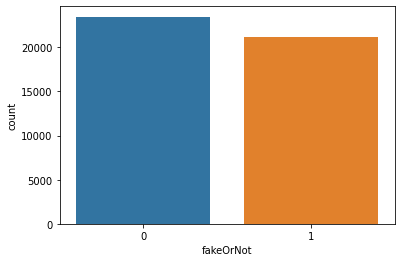

In [ ]:
sns.countplot(df1['fakeOrNot'], label='count')

In [ ]:
realnews = df1[df1['fakeOrNot']==1]
realnews

,subject,fakeOrNot,original
0,"As U.S. budget fight looms, Republicans flip t...",1,"u.s. budget fight loom , republican flip fisca..."
1,politicsNews,1,u.s. military accept transgender recruit monda...
2,politicsNews,1,senior u.s. republican senator : 'let mr. muel...
3,politicsNews,1,fbi russia probe helped australian diplomat ti...
4,politicsNews,1,trump want postal service charge 'much more ' ...
...,...,...,...
21203,worldnews,1,'fully committed ' nato back new u.s. approach...
21204,worldnews,1,lexisnexis withdrew two product chinese market...
21205,worldnews,1,minsk cultural hub becomes authority minsk ( r...
21206,worldnews,1,vatican upbeat possibility pope francis visiti...


In [ ]:
fakenews = df1[df1['fakeOrNot']==0]
fakenews

,SUBJECT,fakeOrNot,original
5981,News,0,teen record abusing girl : ‘ this people act u...
5982,News,0,professional panderer carly fiorina say ted cr...
5983,News,0,poll find white republican angry nearly time n...
5984,News,0,"what ’ s happening oregon treason , founder ex..."
5985,News,0,right-wing scumbags bundy militiaman say they ...
...,...,...,...
11954,Middle-east,0,liberal imperium : quigley ’ s anglo-american ...
11955,Middle-east,0,"syria , north korea : trump ’ s “ axis evil ” ..."
11956,Middle-east,0,afghanistan : trump surge graveyard empire ram...
11957,Middle-east,0,"black politician increase attack ben carson , ..."


**PLOT THE WORD CLOUD**

In [ ]:
#make the news into a single string
sentences = df1['original'].tolist()
sentences

['trump budget open new fight among republican washington ( reuters ) - republican u.s. representative todd rokita keep clock hanging wall capitol hill office track u.s. government ’ s rising debt real time reminds top priority : reining federal spending . “ i sent fiscal note , ” said indiana lawmaker vice chairman house representative budget committee , rode republican wave first election congress 2010. president donald trump unveils budget 2018 fiscal year thursday , rokita among many conservative republican cheering proposed cut domestic program would pay military buildup . moderate republican le enthusiastic worry trump ’ s budget could force lawmaker choose opposing president backing reduction popular program aid disabled child hot meal elderly . “ what would hope administration aware difficulty thing , ” said representative tom cole oklahoma . release trump ’ s budget , come republican president facing intraparty revolt proposed legislation replace obamacare healthcare law , cou

In [ ]:
len(sentences)

11959

In [ ]:
sentences_as_one_string= " ".join(sentences)

In [ ]:
import matplotlib.pyplot as plt

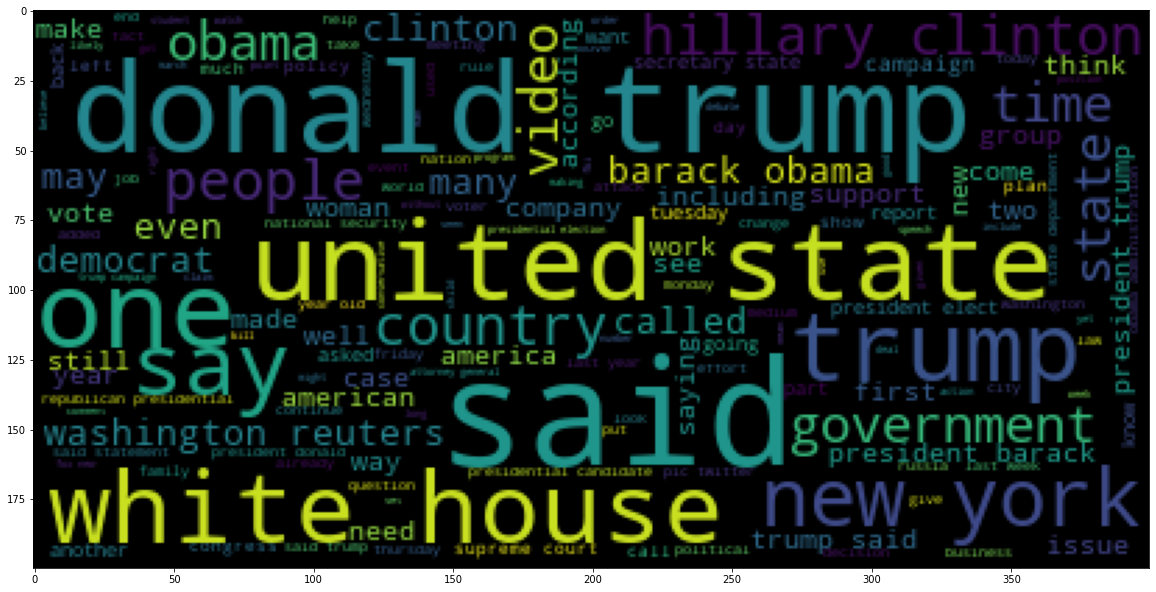

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

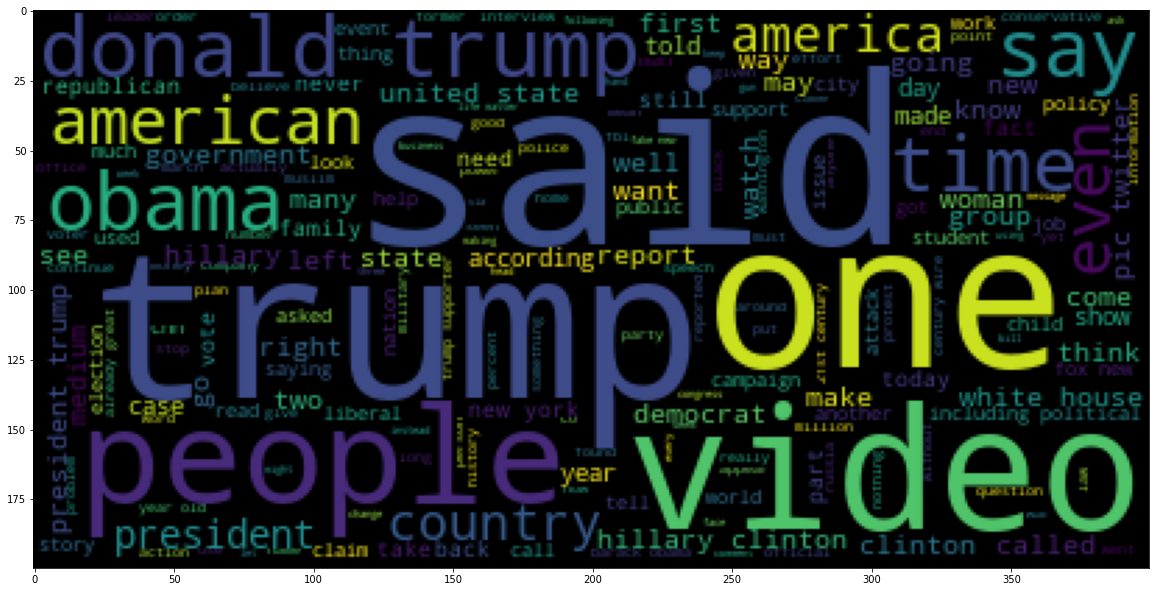

In [ ]:
fake_list = fakenews['original'].tolist()
fake_sentences_as_one_string = " ".join(fake_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(fake_sentences_as_one_string))

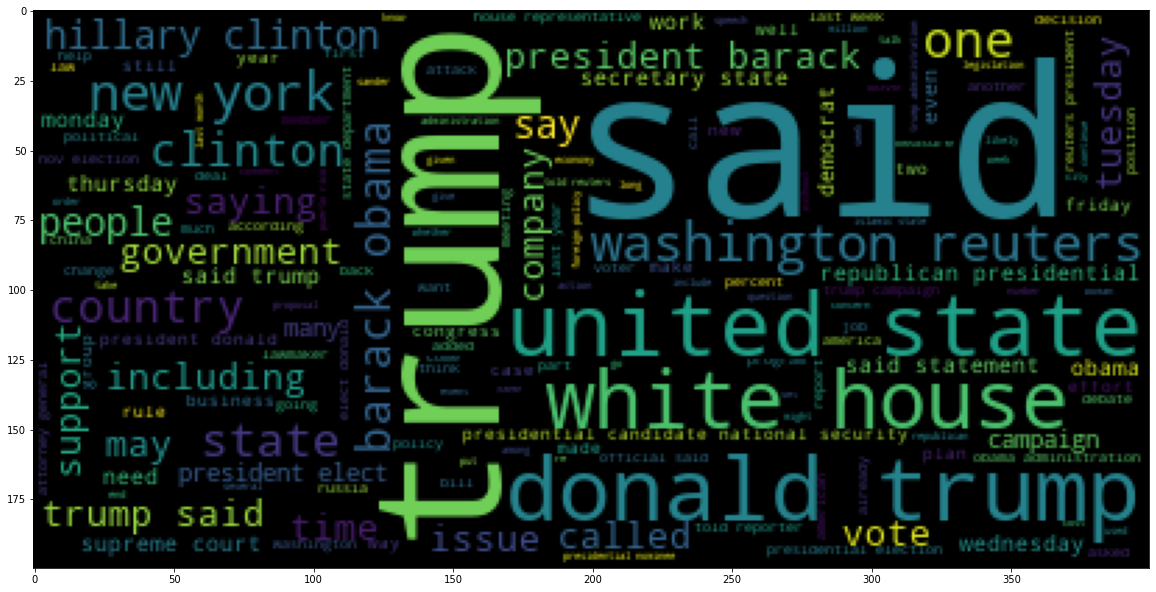

In [ ]:
real_lists = realnews['original'].tolist()
real_sentences_as_one_string = " ".join(real_lists)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(real_sentences_as_one_string))

In [ ]:
#model building

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
df1['compound'] = df1['original'].apply(lambda x: sid.polarity_scores(x)['compound'])
df1['negative'] = df1['original'].apply(lambda x: sid.polarity_scores(x)['neg'])
df1['neutral'] = df1['original'].apply(lambda x: sid.polarity_scores(x)['neu'])
df1['positive'] = df1['original'].apply(lambda x: sid.polarity_scores(x)['pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from scipy import stats

In [ ]:
# Adding Subjectivity and Polarity columns
from sklearn.metrics import accuracy_score,classification_report
from textblob import TextBlob
def getsubj(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df1['Subjectivity']=df1['original'].apply(getsubj)
df1['Polarity']=df1['original'].apply(getpolarity)
df1

,subject,fakeOrNot,original,compound,negative,neutral,positive,Subjectivity,Polarity
0,"As U.S. budget fight looms, Republicans flip t...",1,"u.s. budget fight loom , republican flip fisca...",-0.7906,0.429,0.571,0.000,0.000000,0.000000
1,politicsNews,1,u.s. military accept transgender recruit monda...,0.9734,0.082,0.760,0.158,0.305279,0.091902
2,politicsNews,1,senior u.s. republican senator : 'let mr. muel...,0.3818,0.072,0.838,0.090,0.317998,0.117067
3,politicsNews,1,fbi russia probe helped australian diplomat ti...,-0.1761,0.094,0.815,0.091,0.276172,0.046841
4,politicsNews,1,trump want postal service charge 'much more ' ...,0.9816,0.080,0.782,0.138,0.380435,0.058424
...,...,...,...,...,...,...,...,...,...
44680,Middle-east,0,mcpain : john mccain furious iran treated u sa...,0.8271,0.156,0.666,0.178,0.438181,0.026285
44681,Middle-east,0,justice ? yahoo settle e-mail privacy class-ac...,0.2732,0.096,0.797,0.107,0.489732,0.099107
44682,Middle-east,0,sunnistan : u allied ‘ safe zone ’ plan take t...,-0.9928,0.175,0.653,0.173,0.402407,0.061129
44683,Middle-east,0,blow $ 700 million : al jazeera america finall...,0.8442,0.085,0.803,0.112,0.408542,0.096250


In [ ]:
# Extracting data req for model building
model = df1[['fakeOrNot', 'compound', 'negative', 'neutral', 'positive','Subjectivity','Polarity']]
model.head()

,fakeOrNot,compound,negative,neutral,positive,Subjectivity,Polarity
0,1,-0.7906,0.429,0.571,0.000,0.000000,0.000000
1,1,0.9734,0.082,0.760,0.158,0.305279,0.091902
2,1,0.3818,0.072,0.838,0.090,0.317998,0.117067
3,1,-0.1761,0.094,0.815,0.091,0.276172,0.046841
4,1,0.9816,0.080,0.782,0.138,0.380435,0.058424


In [ ]:
model.dtypes

fakeOrNot         int64
compound        float64
negative        float64
neutral         float64
positive        float64
Subjectivity    float64
Polarity        float64
dtype: object

In [ ]:
X = model.loc[:,'compound':'Polarity']
y = model['fakeOrNot']

In [ ]:
from sklearn.model_selection import train_test_split #for building regression model
from sklearn.preprocessing import MinMaxScaler  #For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse   #For model evaluation
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(l.intercept_)

6.723731091295059


In [ ]:
yhat=l.predict(X_test)

In [ ]:
# Actual vs Predicted 
dframe = pd.DataFrame(y_test,yhat)
dfr=pd.DataFrame({"Actual":y_test,"Predicted":yhat})
dfr

,Actual,Predicted
33147,0,0.391850
29045,0,0.346182
9666,1,0.574469
23351,0,0.346572
25258,0,0.213801
...,...,...
27236,0,0.413870
39795,0,0.557547
9034,1,0.536316
31791,0,0.398126


In [ ]:
l.score(X_test,y_test)*100

15.69376810945078